In [15]:
from numpy import zeros, array
from random import randint
from random import random
from matplotlib import pyplot

In [2]:
def next_frame(last_step, last_frame, column):
    lower = max(0,last_step-1)
    upper = min(last_frame.shape[0]-1,last_step+1)
    step = randint(lower,upper)
    frame = last_frame.copy()
    frame[step,column] = 1
    return frame, step

In [3]:
def build_frames(size):
    frames = list()
    frame = zeros((size,size))
    step = randint(0,size-1)
    right=1 if random()<0.5 else 0
    col=0 if right else size-1
    frame[step,col] = 1
    frames.append(frame)
    
    for i in range(1,size):
        col = i if right else size-1-i
        frame,step = next_frame(step, frame, col)
        frames.append(frame)
    return frames, right

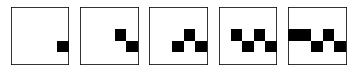

In [4]:
size = 5
frames,right = build_frames(size)
pyplot.figure()
for i in range(size):
    pyplot.subplot(1,size,i+1)
    pyplot.imshow(frames[i],cmap='Greys')
    ax = pyplot.gca()
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
pyplot.show()

In [5]:
# generate multiple sequences

In [6]:
def generate_examples(size, n_patterns):
    X,y = list(), list()
    for _ in range(n_patterns):
        frames, right = build_frames(size)
        X.append(frames)
        y.append(right)
    X = array(X).reshape(n_patterns, size, size, size,1)
    y = array(y).reshape(n_patterns,1)
    return X,y

In [7]:
size = 50

In [10]:
from keras.models import Sequential
from keras.layers import Conv2D
from keras.layers import MaxPooling2D
from keras.layers import LSTM
from keras.layers import Dense
from keras.layers import Flatten
from keras.layers import TimeDistributed

Using TensorFlow backend.


In [12]:
model = Sequential()
model.add(TimeDistributed(Conv2D(2,(2,2),activation='relu'),input_shape = (None, size,size,1)))
model.add(TimeDistributed(MaxPooling2D(pool_size=(2,2))))
model.add(TimeDistributed(Flatten()))
model.add(LSTM(50))
model.add(Dense(1,activation='sigmoid'))
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['acc'])
print(model.summary())

W0813 22:24:41.691185 139690851014464 module_wrapper.py:136] From /home/arvind/.local/lib/python3.6/site-packages/tensorflow_core/python/util/module_wrapper.py:163: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.

W0813 22:24:41.723800 139690851014464 deprecation.py:323] From /home/arvind/.local/lib/python3.6/site-packages/tensorflow_core/python/ops/nn_impl.py:183: where (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
time_distributed_3 (TimeDist (None, None, 49, 49, 2)   10        
_________________________________________________________________
time_distributed_4 (TimeDist (None, None, 24, 24, 2)   0         
_________________________________________________________________
time_distributed_5 (TimeDist (None, None, 1152)        0         
_________________________________________________________________
lstm_1 (LSTM)                (None, 50)                240600    
_________________________________________________________________
dense_1 (Dense)              (None, 1)                 51        
Total params: 240,661
Trainable params: 240,661
Non-trainable params: 0
_________________________________________________________________
None


In [16]:
X,y = generate_examples(size,10)
model.fit(X,y,batch_size=32,epochs=1,verbose=2)

Epoch 1/1
 - 3s - loss: 0.7073 - acc: 0.7000


In [17]:
X,y = generate_examples(size,5)
loss, acc = model.evaluate(X,y,verbose=0)
print('loss: %f, acc: %f' %(loss,acc*100))

loss: 0.663505, acc: 60.000002


In [18]:
X,y = generate_examples(size,1)
yhat = model.predict_classes(X,verbose=0)
expected = "Right" if y[0]==1 else "Left"
predicted = "Right" if yhat[0]==1 else "Left"
print('Expected: %s, Predicted: %s'%(expected,predicted))

Expected: Left, Predicted: Left
